In [1]:
import pandas as pd
from matplotlib import pyplot as plt
% matplotlib inline

In [2]:
link_id = 3377906288228510514
in_link_id = 3377906289228510514
in_link_id_2 = 3377906282328510514
out_link_id = 4377906289663800514

topo = pd.read_csv('dataset/gy_contest_link_top.txt', sep=';')
topo[topo.link_ID==in_link_id]

,link_ID,in_links,out_links
65,3377906289228510514,3377906282328510514#9377906281555510514,3377906288228510514


In [3]:
# load dataset
train_set = pd.read_csv('dataset/gy_contest_link_traveltime_training_data.txt', sep=';', parse_dates=['date'])

In [4]:
sample = train_set[train_set.link_ID==link_id]
sample = sample[
    (sample.date.dt.year==2016)&(sample.date.dt.month==4)&(sample.date.dt.day==10)]
sample = sample.sort_values(by='time_interval')
sample.shape

(645, 4)

In [5]:
sample.head(4)

,link_ID,date,time_interval,travel_time
6117413,3377906288228510514,2016-04-10,"[2016-04-10 00:00:00,2016-04-10 00:02:00)",2.5
6097322,3377906288228510514,2016-04-10,"[2016-04-10 00:02:00,2016-04-10 00:04:00)",2.3
6086202,3377906288228510514,2016-04-10,"[2016-04-10 00:04:00,2016-04-10 00:06:00)",3.0
6110802,3377906288228510514,2016-04-10,"[2016-04-10 00:06:00,2016-04-10 00:08:00)",3.0


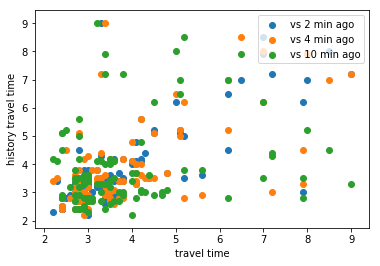

In [6]:
plt.clf()
y = [sample.iloc[i]['travel_time'] for i in range(300, 400, 1)]
x = [sample.iloc[i + 1]['travel_time'] for i in range(300, 400, 1)]
plt.scatter(x, y, label='vs 2 min ago')

y = [sample.iloc[i]['travel_time'] for i in range(300, 400, 1)]
x = [sample.iloc[i + 2]['travel_time'] for i in range(300, 400, 1)]
plt.scatter(x, y, label='vs 4 min ago')

y = [sample.iloc[i]['travel_time'] for i in range(300, 400, 1)]
x = [sample.iloc[i + 5]['travel_time'] for i in range(300, 400, 1)]
plt.scatter(x, y, label='vs 10 min ago')
plt.legend(loc = 'upper right')
plt.xlabel('travel time')
plt.ylabel('history travel time')

In [82]:
plt.plot?

(581, 8)

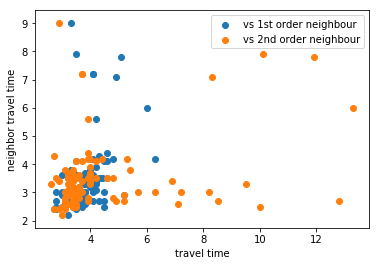

In [44]:
sample_base = train_set[(train_set.date.dt.year==2016)&(train_set.date.dt.month==4)&(train_set.date.dt.day==10)]
sample1 = sample_base[sample_base.link_ID==link_id]
sample2 = sample_base[sample_base.link_ID==in_link_id]
sample3 = sample_base[sample_base.link_ID==out_link_id]
sample4 = sample_base[sample_base.link_ID==in_link_id_2]

joined = pd.merge(sample1, sample2, on=['date', 'time_interval'], suffixes=('', '_in'))
joined = pd.merge(joined, sample4, on=['date', 'time_interval'], suffixes=('', '_in_2'))
joined = joined.sort_values('time_interval')
joined.travel_time_in = joined.travel_time_in.shift(1)
joined.travel_time_in_2 = joined.travel_time_in_2.shift(1)

plt.clf()
plt.scatter(
    joined.travel_time_in.iloc[200:300], 
    joined.travel_time.iloc[200:300], label='vs 1st order neighbour')
plt.scatter(
    joined.travel_time_in_2.iloc[200:300], 
    joined.travel_time.iloc[200:300], label='vs 2nd order neighbour')
plt.legend(loc = 'upper right')
plt.xlabel('travel time')
plt.ylabel('neighbor travel time')
joined.shape